 # Samenvatting

## Begrip kansverdeling

### Relatie met frequenties
Stel:
- Je gooit met 2 dobbelstenen en schrijft de som van de twee waarden op.
- Wat is de kans dat je een 3 gooit en wat is de kans dat je een 7 gooit?
Deze kansen kunnen benaderen door het experiment heel vaak uit te voeren en te kijken hoe vaak je een 3 of een 7 gooit.
We kunnen de kans ook theoretisch berekenen.
- Er zijn 36 mogelijke uitkomsten (6 mogelijkheden voor de eerste dobbelsteen en 6 mogelijkheden voor de tweede dobbelsteen).

**Worpen**

|       | 1     | 2     | 3     | 4     | 5     | 6     |
|-------|-------|-------|-------|-------|-------|-------|
| **1** | (1,1) | (1,2) | (1,3) | (1,4) | (1,5) | (1,6) |
| **2** | (2,1) | (2,2) | (2,3) | (2,4) | (2,5) | (2,6) |
| **3** | (3,1) | (3,2) | (3,3) | (3,4) | (3,5) | (3,6) |
| **4** | (4,1) | (4,2) | (4,3) | (4,4) | (4,5) | (4,6) |
| **5** | (5,1) | (5,2) | (5,3) | (5,4) | (5,5) | (5,6) |
| **6** | (6,1) | (6,2) | (6,3) | (6,4) | (6,5) | (6,6) |

⇒

**Som van de ogen**

|       | 1 | 2 | 3 | 4  | 5  | 6  |
|-------|---|---|---|----|----|----|
| **1** | 2 | 3 | 4 | 5  | 6  | 7  |
| **2** | 3 | 4 | 5 | 6  | 7  | 8  |
| **3** | 4 | 5 | 6 | 7  | 8  | 9  |
| **4** | 5 | 6 | 7 | 8  | 9  | 10 |
| **5** | 6 | 7 | 8 | 9  | 10 | 11 |
| **6** | 7 | 8 | 9 | 10 | 11 | 12 |

Uit bovenstaande tabel kunnen we afleiden dat:
- Het gooien van een som van 7 het vaakste voorkomt.

Als we willen weten wat de kans is om een 3 te gooien, dan moeten we tellen hoeveel van de 36 mogelijkheden een som van 3 opleveren. Dit zijn er 2: (1,2) en (2,1). De kans om een 3 te gooien is dus 2/36 = 1/18.

Voor de andere waarden vinden we:

| Waarde | Kans |
|--------|------|
| 2      | 1/36 |
| 3      | 2/36 |
| 4      | 3/36 |
| 5      | 4/36 |
| 6      | 5/36 |
| 7      | 6/36 |
| 8      | 5/36 |
| 9      | 4/36 |
| 10     | 3/36 |
| 11     | 2/36 |
| 12     | 1/36 |

In Python kunnen we deze kansen ook laten zien:

<BarContainer object of 11 artists>

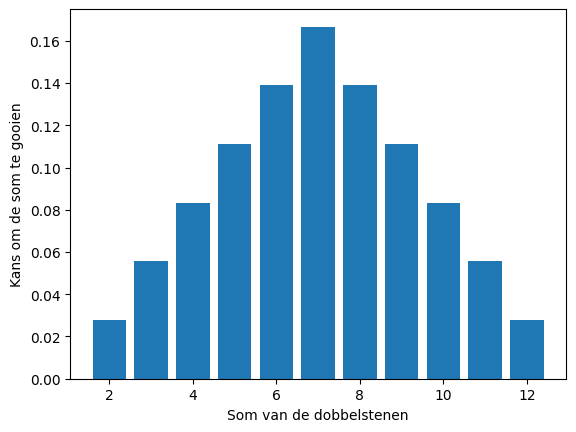

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

value = range(2, 13)
probability = pd.Series([1, 2, 3, 4, 5, 6, 5, 4, 3, 2, 1]) / 36
fix, ax = plt.subplots()
ax.set_xlabel('Som van de dobbelstenen')
ax.set_ylabel('Kans om de som te gooien')
ax.bar(value, probability)

Bovenstaande grafiek wordt een kansverdeling genoemd.
Een kansverdeling is een overzicht van alle relatieve frequenties van een oneindige steekproef.
